Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Jeong woo Park"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

\[1,5,6,2,3,8,9,4,7\] -> \[1,5,6,2,3,8,9,4 | 7\] ->\[1,5,6,2,3, |8| 9,4 | 7\] -> \[1,5,6,2,3, |8,9| ,4, |7\] -> \[1,5,6,2,3,4, |9,8|, |7\] -> \[1,5,6,2,3,4,7,9,8\]

1. The array after the process is doene : \[1,5,6,2,3,4,7,9,8\]
2. The value of i after the process is done : 5


## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [2]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    x = A[r]
    i = p-1
    for j in range(p,r):
        if A[j] <= x:
            i +=1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r]= A[r],A[i+1]
    return i+1

In [3]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [4]:
def quick_sort(A,p,r):
    if p<r:
        
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
        
    return A

In [5]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


As the below two graphs show, the elements of having all the same value and elements of having reversed order looks similar. This is because the partitioning method we chose. Our choice of partitioning chose the tail of the given list and the second iteration of quicksort went through n-1 elements after the first partitioning. So, the list did not break into two with similar sizes. It is both for scenario 1 and 2.

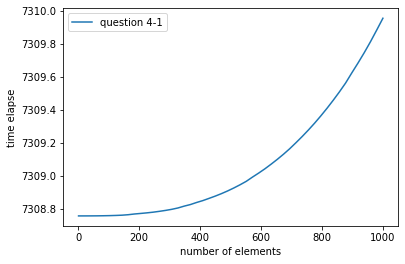

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import time

x = np.linspace(1,1000)

#1 All elements of array A have the same value
y1 = []
for t in x:
    
    A = []
    for k in range(int(t)): #making a list of only 1s
        A.append(1)
    quick_sort(A, 0, int(t)-1) 
    y1.append(time.perf_counter()) #calculate time elapse
 
plt.xlabel("number of elements")
plt.ylabel("time elapse")
plt.plot(x, y1, label = "question 4-1")
plt.legend()
plt.show()  #show the time elapse depending on input list size


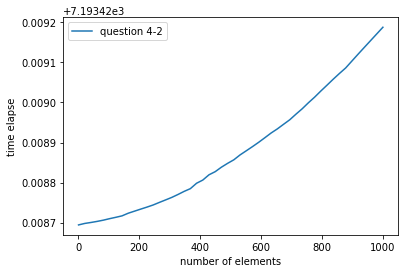

In [47]:
#2

y2 = []
plt.clf()
for k in range(1, len(x)+1): 
    B = [t in range(k, 0, -1)] #make a list of 1 to k but in reversed order
    quick_sort(B,0,len(B)-1)
    y2.append(time.perf_counter())

plt.xlabel("number of elements")
plt.ylabel("time elapse")
plt.plot(x,y2, label = "question 4-2")
plt.legend()
plt.show()